In [1]:
import os
import gc
from tqdm import tqdm
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "DejaVu Serif"
import matplotlib as mpl
import math

# %matplotlib widget
basePath = "./sims.TNG/TNG50-1/output"

Snapshot_Init = 33
Snapshot_End = 99
Lbsg_Indcies_Array = np.array(
    [117251, 300903, 324123, 329508, 382215,
        400973, 419618, 457431, 460722, 490814]
)

h = 0.6774  # km/Mpc

m_dm = 4.5e-5  # E10M_Sum
m_dm_h = m_dm * h

Critial_Density = 1.27e-8  # E10M_Sum/kpc^3
Critial_Density_h = Critial_Density / h**2  # E10M_Sum/(kpc/h)^3

Redshift = np.array([20.05, 14.99, 11.98, 10.98, 10.00, 9.39, 9.00, 8.45, 8.01, 7.60,
                     7.24, 7.01, 6.49, 6.01, 5.85, 5.53, 5.23, 5.00, 4.66, 4.43,
                     4.18, 4.01, 3.71, 3.49, 3.28, 3.01, 2.90, 2.73, 2.58, 2.44,
                     2.32, 2.21, 2.10, 2.00, 1.90, 1.82, 1.74, 1.67, 1.60, 1.53,
                     1.50, 1.41, 1.36, 1.30, 1.25, 1.21, 1.15, 1.11, 1.07, 1.04,
                     1.00, 0.95, 0.92, 0.89, 0.85, 0.82, 0.79, 0.76, 0.73, 0.70,
                     0.68, 0.64, 0.62, 0.60, 0.58, 0.55, 0.52, 0.50, 0.48, 0.46,
                     0.44, 0.42, 0.40, 0.38, 0.36, 0.35, 0.33, 0.31, 0.30, 0.27,
                     0.26, 0.24, 0.23, 0.21, 0.20, 0.18, 0.17, 0.15, 0.14, 0.13,
                     0.11, 0.10, 0.08, 0.07, 0.06, 0.05, 0.03, 0.02, 0.01, 0.00])

Host_Index_At_99 = 329508

Host_Index_At_98 = 329045
Satellite_Index_At_98 = 329051



In [2]:
Subhalo_Dict=il.groupcat.loadSingle(basePath,Snapshot_End,-1,Host_Index_At_99)

Host_Tree=il.sublink.loadTree(basePath,Snapshot_End-1,Host_Index_At_98,['SubfindID','SnapNum','SubhaloMass'],onlyMPB=1)

Satellite_Tree=il.sublink.loadTree(basePath,Snapshot_End-1,Satellite_Index_At_98,['SubfindID','SnapNum','SubhaloMass'],onlyMPB=1)


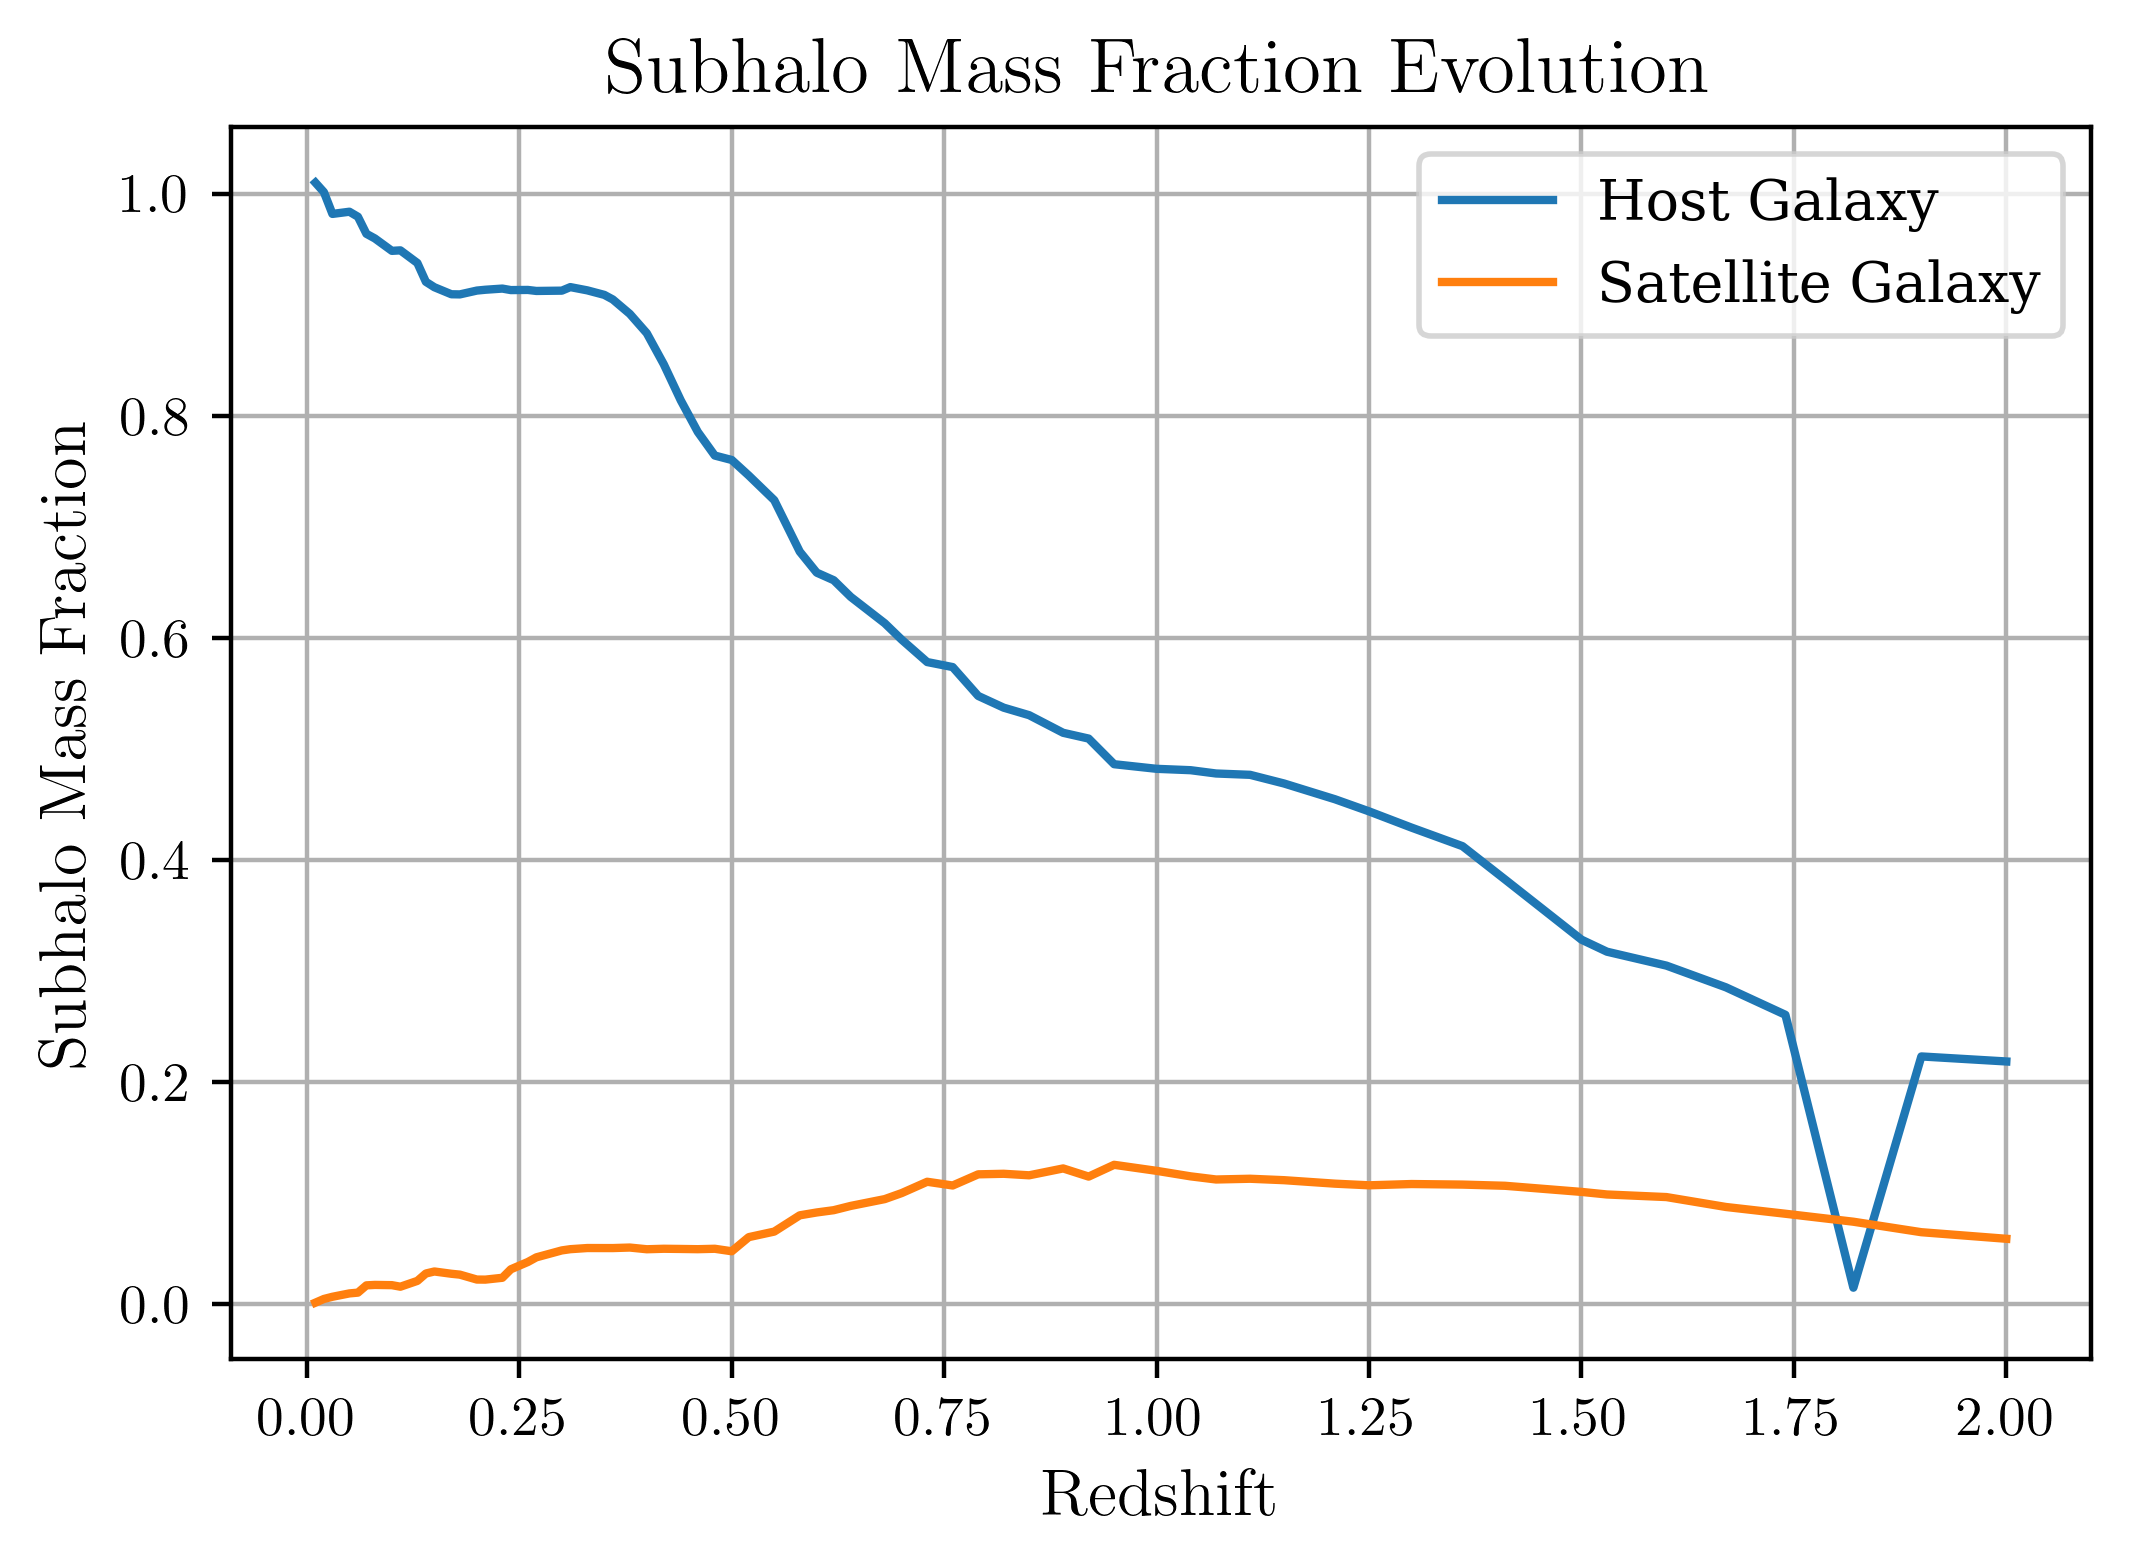

In [4]:
plt.figure(figsize=(6,4),dpi=400)
plt.plot(Redshift[::-1][1:67],Host_Tree['SubhaloMass'][:66]/Subhalo_Dict['SubhaloMass'],label='Host Galaxy')
plt.plot(Redshift[::-1][1:67],Satellite_Tree['SubhaloMass'][:66]/Subhalo_Dict['SubhaloMass'],label='Satellite Galaxy')

plt.xlabel(r'Redshift', usetex=True, fontsize=12)
plt.ylabel(r'Subhalo Mass Fraction', usetex=True, fontsize=12)
plt.title('Subhalo Mass Fraction Evolution', usetex=True, fontsize=14)

# 设置坐标轴刻度字体
plt.xticks(fontsize=10,usetex=1)
plt.yticks(fontsize=10,usetex=1)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "DejaVu Serif"

plt.grid()
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_family("DejaVu Serif")

# 添加图例
plt.legend()


---
Calculate the Mass Fraction Evolution

In [3]:
all_tree=il.sublink.loadTree(basePath,Snapshot_End,Host_Index_At_99,['SubfindID','SnapNum','SubhaloMass'])

In [4]:
mass_array=np.zeros(100)
for index in range(len(all_tree['SnapNum'])):
    mass_array[all_tree['SnapNum'][index]]+=all_tree['SubhaloMass'][index]

In [ ]:
plt.figure(figsize=(6,4),dpi=400)
plt.plot(Redshift[::-1][1:67],Host_Tree['SubhaloMass'][:66]/mass_array[34:][::-1],label='Host Galaxy')
plt.plot(Redshift[::-1][1:67],Satellite_Tree['SubhaloMass'][:66]/mass_array[34:][::-1],label='Satellite Galaxy')

plt.xlabel(r'Redshift', usetex=True, fontsize=12)
plt.ylabel(r'Subhalo Mass Fraction', usetex=True, fontsize=12)
plt.title('Subhalo Mass Fraction Evolution', usetex=True, fontsize=14)

# 设置坐标轴刻度字体
plt.xticks(fontsize=10,usetex=1)
plt.yticks(fontsize=10,usetex=1)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "DejaVu Serif"

plt.grid()
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_family("DejaVu Serif")

# 添加图例
plt.legend()

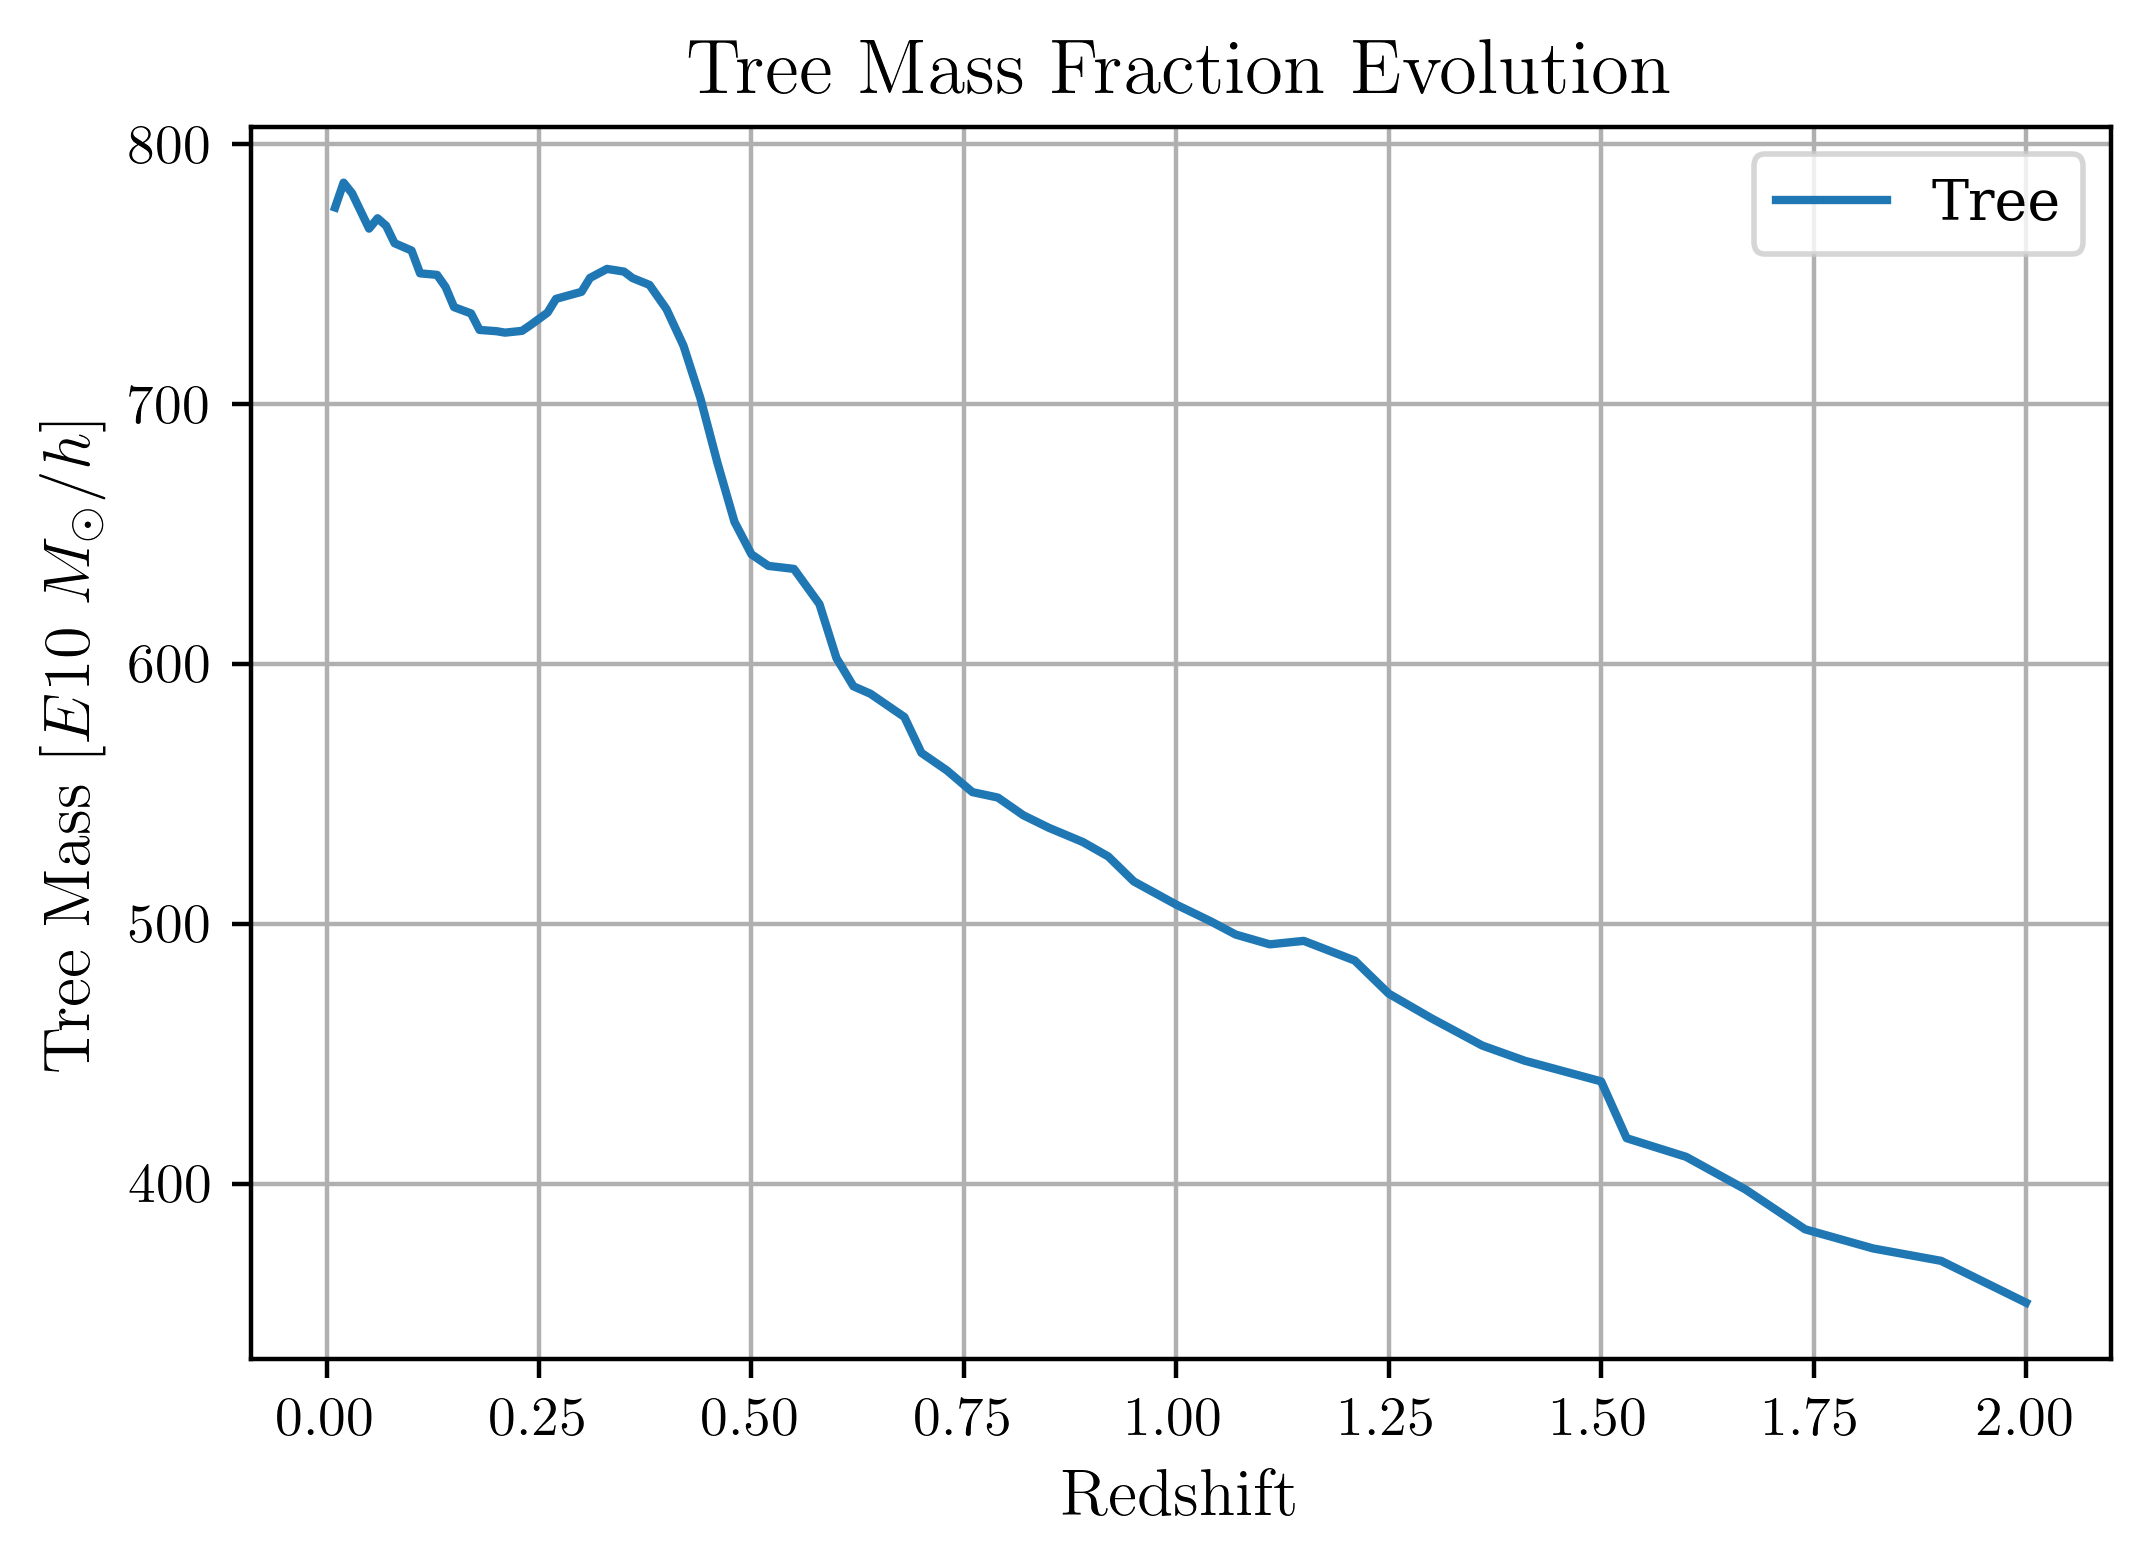

In [6]:
plt.figure(figsize=(6,4),dpi=400)
plt.plot(Redshift[::-1][1:67],mass_array[::-1][:66],label='Tree')

plt.xlabel(r'Redshift', usetex=True, fontsize=12)
plt.ylabel(r'Tree Mass [$E10\ M_\odot /h$]', usetex=True, fontsize=12)
plt.title('Tree Mass Fraction Evolution', usetex=True, fontsize=14)

# 设置坐标轴刻度字体
plt.xticks(fontsize=10,usetex=1)
plt.yticks(fontsize=10,usetex=1)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "DejaVu Serif"

plt.grid()
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_family("DejaVu Serif")

# 添加图例
plt.legend()

---
HI Evolution

In [ ]:
host_HI_masses_array=np.array([])
satellite_HI_masses_array=np.array([])
snapshot_array=np.array([])
for snapshot in range(Snapshot_Init,Snapshot_End):
    if len(np.where(np.array([0.00,0.10,0.20,0.30,0.40,0.50,0.70,1.00,1.50,2.00])==np.round(il.groupcat.loadHeader(basePath,snapshot)['Redshift'],2))[0])==0:continue
    host_index=Host_Tree['SubfindID'][np.where(Host_Tree['SnapNum']==snapshot)[0][0]]
    satellite_index=Satellite_Tree['SubfindID'][np.where(Satellite_Tree['SnapNum']==snapshot)[0][0]]

    host_gas_dict=il.snapshot.loadSubhalo(basePath,snapshot,host_index,'gas',fields=['Masses','NeutralHydrogenAbundance'])
    satellite_gas_dict=il.snapshot.loadSubhalo(basePath,snapshot,satellite_index,'gas',fields=['Masses','NeutralHydrogenAbundance'])

    host_gas_mass=host_gas_dict['Masses']
    host_gas_neutral_hydrogen_abundance=host_gas_dict['NeutralHydrogenAbundance']
    host_gas_neutral_hydrogen_mass=host_gas_mass*host_gas_neutral_hydrogen_abundance
    host_gas_neutral_hydrogen_mass_sum=np.sum(host_gas_neutral_hydrogen_mass)

    satellite_gas_mass=satellite_gas_dict['Masses']
    satellite_gas_neutral_hydrogen_abundance=satellite_gas_dict['NeutralHydrogenAbundance']
    satellite_gas_neutral_hydrogen_mass=satellite_gas_mass*satellite_gas_neutral_hydrogen_abundance
    satellite_gas_neutral_hydrogen_mass_sum=np.sum(satellite_gas_neutral_hydrogen_mass)

    host_HI_masses_array=np.append(host_HI_masses_array,host_gas_neutral_hydrogen_mass_sum)
    satellite_HI_masses_array=np.append(satellite_HI_masses_array,satellite_gas_neutral_hydrogen_mass_sum)
    snapshot_array=np.append(snapshot_array,snapshot)

host_gas_dict_at_99=il.snapshot.loadSubhalo(basePath,Snapshot_End,Host_Index_At_99,'gas',fields=['Masses','NeutralHydrogenAbundance'])
host_gas_mass_at_99=host_gas_dict_at_99['Masses']
host_gas_neutral_hydrogen_abundance_at_99=host_gas_dict_at_99['NeutralHydrogenAbundance']
host_gas_neutral_hydrogen_mass_at_99=host_gas_mass_at_99*host_gas_neutral_hydrogen_abundance_at_99
host_gas_neutral_hydrogen_mass_sum_at_99=np.sum(host_gas_neutral_hydrogen_mass_at_99)


In [ ]:
plt.figure(figsize=(6,4),dpi=400)
plt.plot((snapshot_array)[::-1],(host_HI_masses_array/host_gas_neutral_hydrogen_mass_sum_at_99)[::-1],label='Host Galaxy')
plt.plot((snapshot_array)[::-1],(satellite_HI_masses_array/host_gas_neutral_hydrogen_mass_sum_at_99)[::-1],label='Satellite Galaxy')
plt.grid()

---
Spin

In [ ]:
halo_spin_list = list()
satellite_spin_list=list()

for snapshot in range(Snapshot_Init,Snapshot_End):
    host_index=Host_Tree['SubfindID'][np.where(Host_Tree['SnapNum']==snapshot)[0][0]]
    satellite_index=Satellite_Tree['SubfindID'][np.where(Satellite_Tree['SnapNum']==snapshot)[0][0]]

    host_spin=il.groupcat.loadSingle(basePath,snapshot,-1,host_index)['SubhaloSpin']
    satellite_spin=il.groupcat.loadSingle(basePath,snapshot,-1,satellite_index)['SubhaloSpin']

    halo_spin_list.append(host_spin)
    satellite_spin_list.append(satellite_spin)

In [ ]:
host_spin_at_99=il.groupcat.loadSingle(basePath,Snapshot_End,-1,Host_Index_At_99)['SubhaloSpin']
host_spin_array=np.array(halo_spin_list)
satellite_spin_array=np.array(satellite_spin_list)

In [ ]:
plt.figure(figsize=(6,4),dpi=400)
plt.plot(Redshift[::-1][0:66],(host_spin_array[:,0]/host_spin_at_99[0])[::-1],label='Host Galaxy')
plt.xlabel("Redshift")
plt.ylabel("Spin Ratio")
plt.title('Galaxy Spin Evolution')

In [ ]:
def Spin_Calculator(Snapshot,Host_Dict,Satellite_Index):
    Header=il.groupcat.loadHeader(basePath,Snapshot)

    Satellite_Gas_Dict=il.snapshot.loadSubhalo(basePath,Snapshot,Satellite_Index,'gas',fields=['Coordinates','Velocities','Masses'])
    Satellite_Stars_Dict=il.snapshot.loadSubhalo(basePath,Snapshot,Satellite_Index,'stars',fields=['Coordinates','Velocities','Masses'])
    Satellite_BH_Dict=il.snapshot.loadSubhalo(basePath,Snapshot,Satellite_Index,'5',fields=['Coordinates','Velocities','Masses'])
    Satellite_DM_Dict=il.snapshot.loadSubhalo(basePath,Snapshot,Satellite_Index,'dm',fields=['Coordinates','Velocities'])

    Total_Spin=Baryon_Spin_Calculator_From_Dict(Snapshot,Host_Dict,Satellite_Gas_Dict)+Baryon_Spin_Calculator_From_Dict(Snapshot,Host_Dict,Satellite_Stars_Dict)+Baryon_Spin_Calculator_From_Dict(Snapshot,Host_Dict,Satellite_BH_Dict)+DarkMatter_Spin_Calculator(Snapshot,Host_Dict,Satellite_DM_Dict)
    return Total_Spin

def Baryon_Spin_Calculator_From_Dict(Snapshot,Host_Dict,Particle_Dict):
    Header=il.groupcat.loadHeader(basePath,Snapshot)
    scale_factor=Header['Time']

    Host_Center=Host_Dict['SubhaloPos']*scale_factor
    Host_Velocity=Host_Dict['SubhaloVel']

    Particle_Coordinates=Particle_Dict['Coordinates']*scale_factor
    Particle_Velocities=Particle_Dict['Velocities']*np.sqrt(scale_factor)

    Particle_Coordinates=Particle_Coordinates-Host_Center
    Particle_Velocities=Particle_Velocities-Host_Velocity

    Particle_Angular_Momentum=np.cross(Particle_Coordinates,Particle_Velocities)
    Particle_Angular_Momentum=Particle_Angular_Momentum*Particle_Dict['Masses'].reshape(-1,1)
    Particle_Angular_Momentum_Sum=np.sum(Particle_Angular_Momentum,axis=0)

    return Particle_Angular_Momentum_Sum

def DarkMatter_Spin_Calculator(Snapshot,Host_Dict,Particle_Dict):
    Header=il.groupcat.loadHeader(basePath,Snapshot)
    scale_factor=Header['Time']

    Host_Center=Host_Dict['SubhaloPos']*scale_factor
    Host_Velocity=Host_Dict['SubhaloVel']

    Particle_Coordinates=Particle_Dict['Coordinates']*scale_factor
    Particle_Velocities=Particle_Dict['Velocities']*np.sqrt(scale_factor)

    Particle_Coordinates=Particle_Coordinates-Host_Center
    Particle_Velocities=Particle_Velocities-Host_Velocity

    Particle_Angular_Momentum=np.cross(Particle_Coordinates,Particle_Velocities)
    Particle_Angular_Momentum=Particle_Angular_Momentum*m_dm_h
    Particle_Angular_Momentum_Sum=np.sum(Particle_Angular_Momentum,axis=0)

    return Particle_Angular_Momentum_Sum

In [ ]:
host_spin_list=list()
host_spin_ori=list()
satellite_spin_list=list()
for snapshot in tqdm(range(Snapshot_Init,Snapshot_End)):
    host_index=Host_Tree['SubfindID'][np.where(Host_Tree['SnapNum']==snapshot)[0][0]]
    satellite_index=Satellite_Tree['SubfindID'][np.where(Satellite_Tree['SnapNum']==snapshot)[0][0]]

    Host_Dict=il.groupcat.loadSingle(basePath,snapshot,-1,host_index)
    host_spin=Spin_Calculator(snapshot,Host_Dict,host_index)
    satellite_spin=Spin_Calculator(snapshot,Host_Dict,satellite_index)

    host_spin_list.append(host_spin)
    satellite_spin_list.append(satellite_spin)
    host_spin_ori.append(Host_Dict['SubhaloSpin'])

In [ ]:
halo_spin_array=np.array(host_spin_list)
satellite_spin_array=np.array(satellite_spin_list)
host_spin_ori_array=np.array(host_spin_ori)

In [ ]:
plt.figure(figsize=(6,4),dpi=400)
plt.xlabel("Redshift",usetex=True,fontsize=12)
plt.ylabel("X-Axis Spin",usetex=True,fontsize=12)
plt.title('Galaxy Spin Evolution',usetex=True,fontsize=14)
plt.plot(Redshift[::-1][0:60],np.abs(halo_spin_array[5:][:,0][::-1]),label='Host Galaxy')
plt.plot(Redshift[::-1][0:60],np.abs(satellite_spin_array[5:][:,0][::-1]),label='Satellite Galaxy')
plt.plot(Redshift[::-1][0:60],np.abs(halo_spin_array[5:][:,0][::-1]+satellite_spin_array[5:][:,0][::-1]),label='Spin Sum')
plt.grid()
plt.yscale('log')

legend = plt.legend()
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_family("DejaVu Serif")

plt.legend()

In [ ]:
#return the length of a given array of shape(N,3)
def length_calculator(array):
    return np.sqrt(np.sum(array**2,axis=1))

In [ ]:
plt.figure(figsize=(6,4),dpi=400)
plt.xlabel("Redshift",usetex=True,fontsize=12)
plt.ylabel("Spin",usetex=True,fontsize=12)
plt.title('Galaxy Spin Evolution',usetex=True,fontsize=14)
plt.plot(Redshift[::-1][0:60],length_calculator((halo_spin_array[5:][::-1])),label='Host Galaxy')
plt.plot(Redshift[::-1][0:60],length_calculator((satellite_spin_array[5:][::-1])),label='Satellite Galaxy')
plt.plot(Redshift[::-1][0:60],length_calculator((halo_spin_array[5:][::-1]))+length_calculator((satellite_spin_array[5:][::-1])),label='Spin Sum')
plt.grid()
#plt.yscale('log')

legend = plt.legend()
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_family("Lora")



---
Cold Gas

In [7]:
def Cold_Gas_Mass_Calculator(Snapshot, Subhalo_Index):
    Gas_Dict=il.snapshot.loadSubhalo(basePath,Snapshot,Subhalo_Index,'gas',fields=['Masses','InternalEnergy','ElectronAbundance'])
    if len(Gas_Dict)==1:return 0,0
    Gas_Masses=Gas_Dict['Masses'].astype(np.float64)
    Gas_Internal_Energy=Gas_Dict['InternalEnergy'].astype(np.float64)
    Gas_Electron_Abundance=Gas_Dict['ElectronAbundance'].astype(np.float64)

    m_p=1.673E-24
    X_H=0.76
    unit_switching=1E10
    mean_molecular_weight=4*m_p/(1+3*X_H+4*X_H*Gas_Electron_Abundance)
    k_B=1.38E-16
    gas_cell_temperature_in_Kelvin=2/3*Gas_Internal_Energy/k_B*unit_switching*mean_molecular_weight

    condition = (gas_cell_temperature_in_Kelvin < 10000)
    index = np.where(condition)[0]

    return np.sum(Gas_Masses[index]),np.sum(Gas_Masses)

In [ ]:
Host_Cold_Gas_Mass_Array=np.array([])
Host_Total_Gas_Mass_Array=np.array([])
Satellite_Cold_Gas_Mass_Array=np.array([])
Satellite_Total_Gas_Mass_Array=np.array([])

for Snapshot,Host_Index,Satellite_Index in tqdm(zip(Host_Tree['SnapNum'],Host_Tree['SubfindID'],Satellite_Tree['SubfindID'])):
    if Snapshot<67:break

    Host_Cold_Gas_Mass,Host_Total_Gas_Mass=Cold_Gas_Mass_Calculator(Snapshot,Host_Index)
    Satellite_Cold_Gas_Mass,Satellite_Total_Gas_Mass=Cold_Gas_Mass_Calculator(Snapshot,Satellite_Index)

    Host_Cold_Gas_Mass_Array=np.append(Host_Cold_Gas_Mass_Array,Host_Cold_Gas_Mass)
    Host_Total_Gas_Mass_Array=np.append(Host_Total_Gas_Mass_Array,Host_Total_Gas_Mass)
    Satellite_Cold_Gas_Mass_Array=np.append(Satellite_Cold_Gas_Mass_Array,Satellite_Cold_Gas_Mass)
    Satellite_Total_Gas_Mass_Array=np.append(Satellite_Total_Gas_Mass_Array,Satellite_Total_Gas_Mass)




In [ ]:
plt.figure(figsize=(6,4),dpi=400)
plt.xlabel("Redshift",usetex=True,fontsize=12)
plt.ylabel("Cold Gas Mass [E10 $M_\odot$/h]",usetex=True,fontsize=12)
plt.title('Galaxy Cold Gas Mass Evolution',usetex=True,fontsize=14)
plt.plot(Redshift[::-1][0:32],Host_Cold_Gas_Mass_Array,label='Host Galaxy')
plt.plot(Redshift[::-1][0:32],Satellite_Cold_Gas_Mass_Array,label='Satellite Galaxy')
plt.plot(Redshift[::-1][0:32],Host_Cold_Gas_Mass_Array+Satellite_Cold_Gas_Mass_Array,label='Cold Gas Mass Sum')
plt.grid()

In [4]:
all_tree.keys()

dict_keys(['count', 'SubfindID', 'SnapNum', 'SubhaloMass'])

In [9]:
import multiprocessing
from tqdm import tqdm

def process_data(index):
    snapshot = all_tree['SnapNum'][index]
    subfindid = all_tree['SubfindID'][index]
    cold_gas_mass, gas_mass = Cold_Gas_Mass_Calculator(snapshot, subfindid)
    cold_gas_mass_array[snapshot] += cold_gas_mass

if __name__ == "__main__":
    num_processes = 32  # Set the number of processes

    cold_gas_mass_array = multiprocessing.Array('d', 100)  # Shared array for storing results

    with multiprocessing.Pool(processes=num_processes) as pool:
        indices = list(range(len(all_tree['SnapNum'])))
        list(tqdm(pool.imap(process_data, indices), total=len(indices)))

    cold_gas_mass_array = np.array(cold_gas_mass_array)

100%|██████████| 583530/583530 [32:00<00:00, 303.89it/s]  


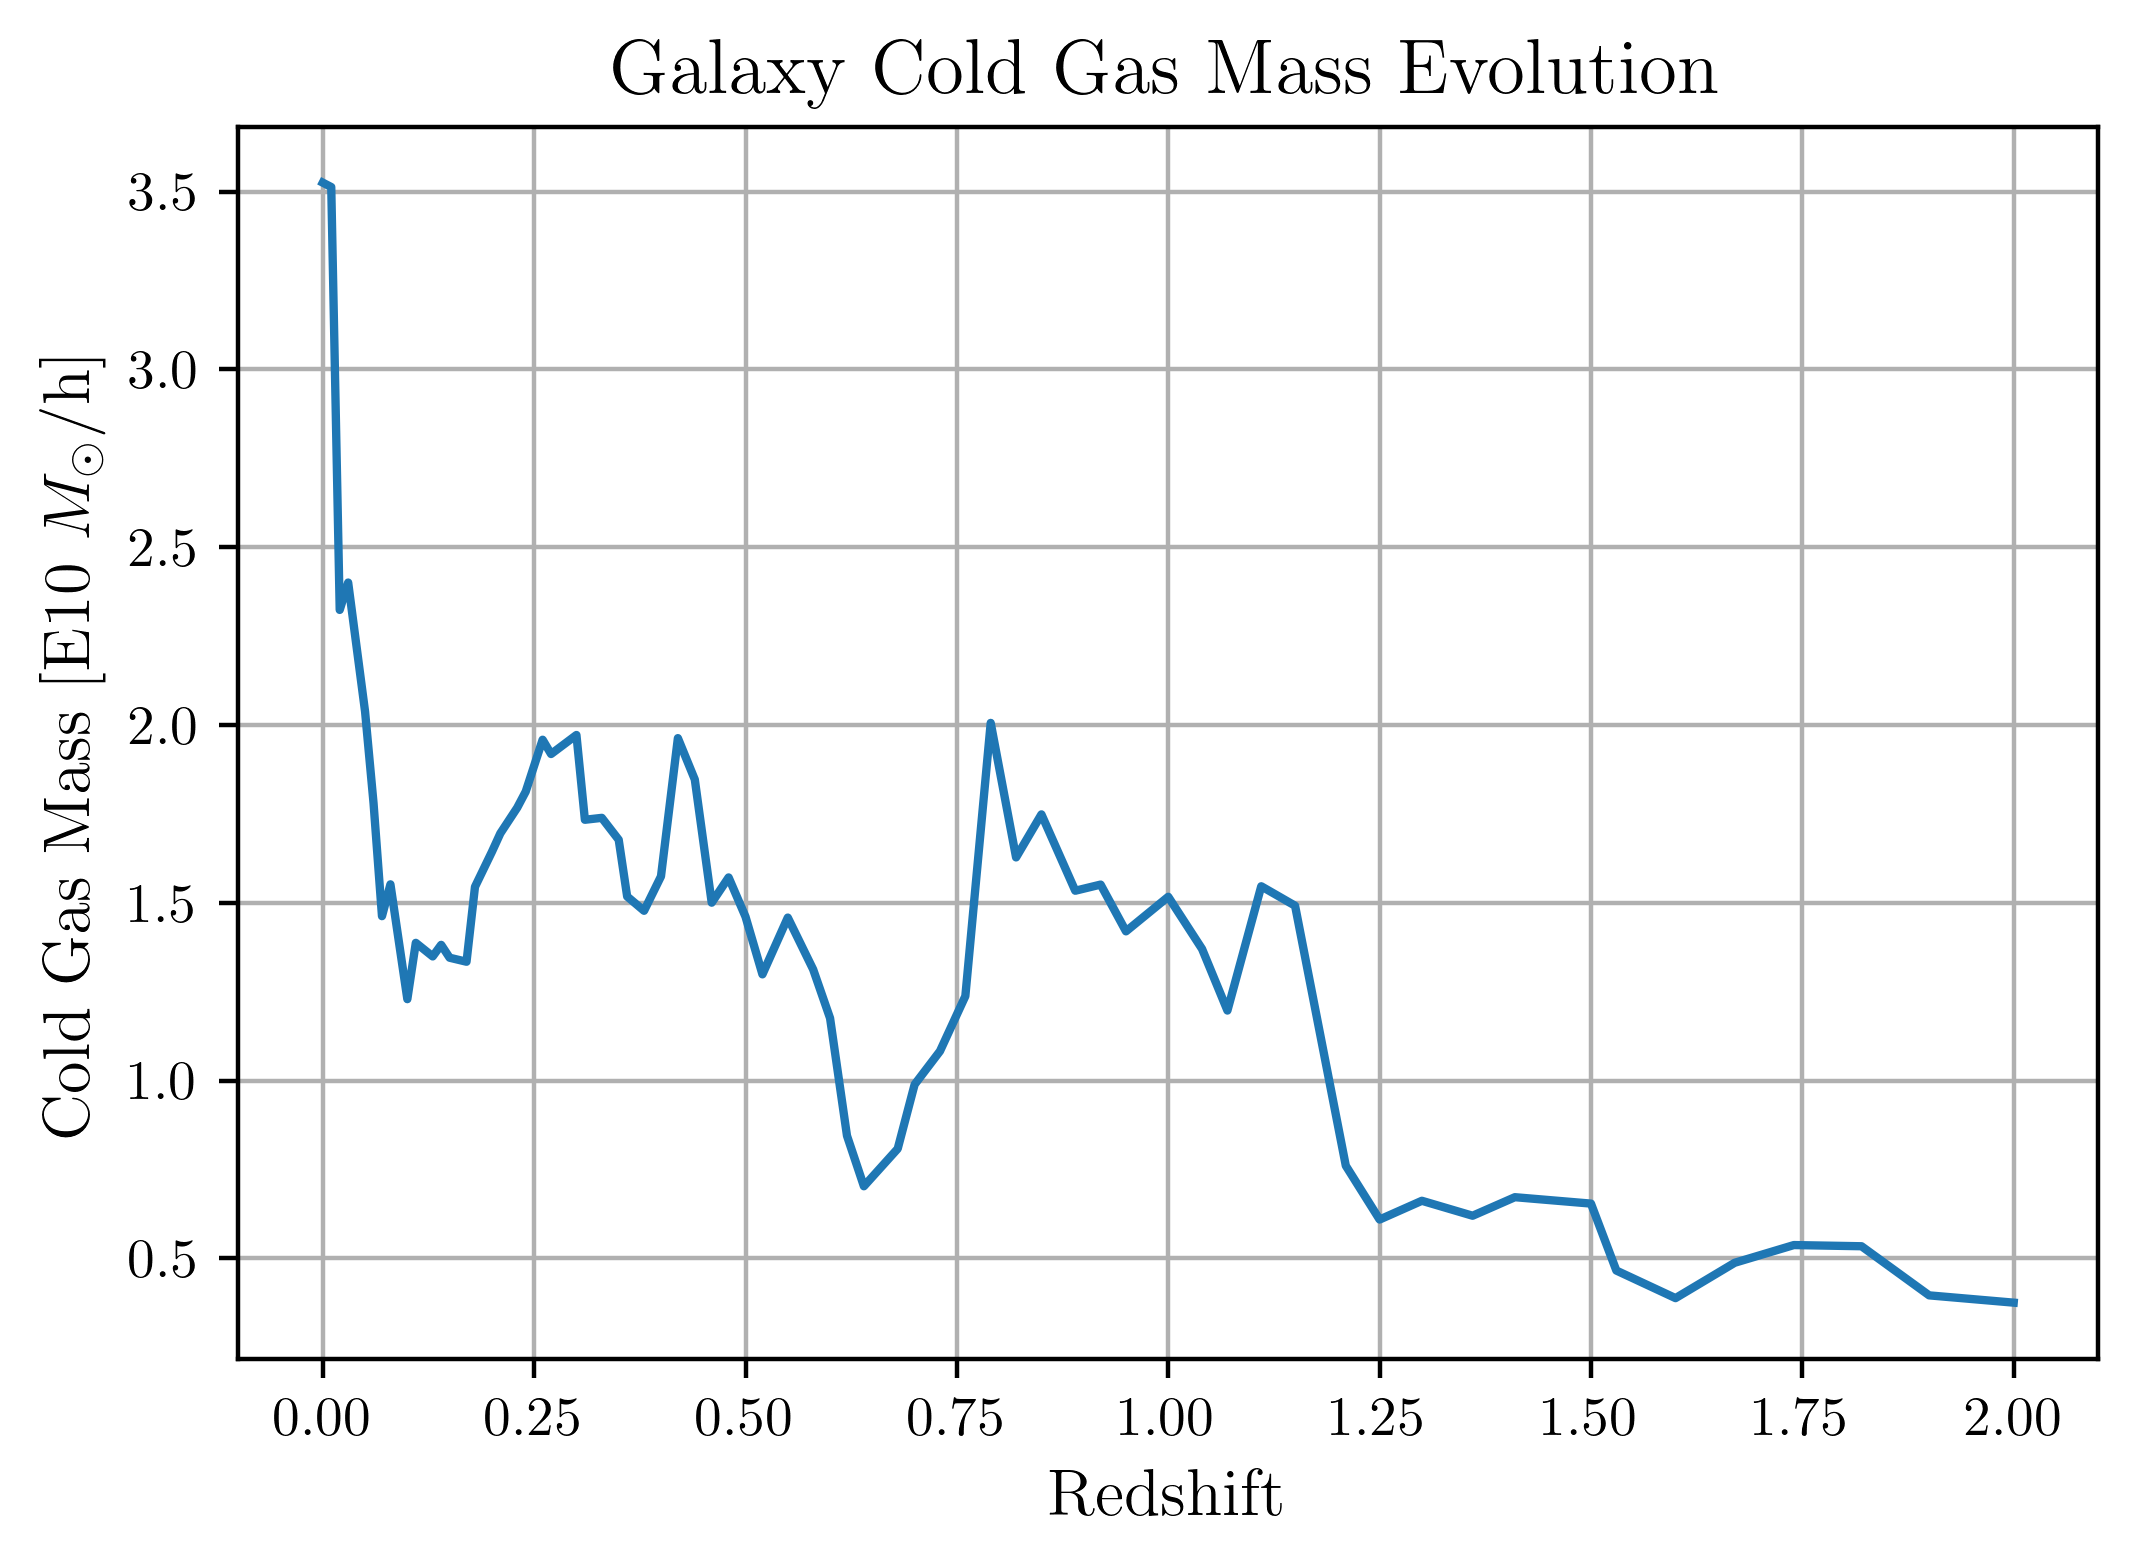

In [15]:
plt.figure(figsize=(6,4),dpi=400)
plt.xticks(fontsize=10,usetex=1)
plt.yticks(fontsize=10,usetex=1)
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "DejaVu Serif"

plt.xlabel("Redshift",usetex=True,fontsize=12)
plt.ylabel("Cold Gas Mass [E10 $M_\odot$/h]",usetex=True,fontsize=12)
plt.title('Galaxy Cold Gas Mass Evolution',usetex=True,fontsize=14)
plt.plot(Redshift[::][33:],cold_gas_mass_array[33:],label='Host Galaxy')

plt.grid()

In [ ]:
np.save('cold_gas_mass_array.npy',cold_gas_mass_array)